In [1]:
# Load the libs
import framework
import numpy as np

In [2]:
data_sample = np.load('sample_data.npz')
# Load the sample data for testing the framework
data_frames = data_sample.f.data_frames
frame_label = data_sample.f.frame_label
frame_subject = data_sample.f.frame_subject

data_frames = np.reshape(data_frames, newshape=(data_frames.shape[0], data_frames.shape[1], data_frames.shape[2], 1))


In [6]:
# Select the frame labels
select_idx = [i for i, e in enumerate(frame_label) if e == 0 or e == 2]
data_frames_s = data_frames[select_idx]
frame_label_s = frame_label[select_idx]
frame_subject_s = frame_subject[select_idx]

In [11]:
class_unique = np.unique(frame_label_s)
class_unique = class_unique.tolist()
class_count = len(class_unique)
class_labels_n = []
for fl in frame_label_s:
    class_labels_n.append(class_unique.index(fl))
class_labels_n = np.asarray(class_labels_n)

In [12]:
ad_model = framework.AdversarialModel(data_samples = data_frames_s, class_label=class_labels_n, subject_label=frame_subject_s, exclude_idx=35)

In [13]:
main_losses, adv_losses, main_accs, adv_accs, cf_matrix, test_acc = ad_model.train()

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/yiyuan/Library/CloudStorage/OneDrive-UniversityofEssex/PG Research/2_Codes/2022_GenerativeModel/PainEEG_GenerativeModel/PainEEG_GenerativeModel/Untitled/trans_net.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.fc2(x))


[1/50][0/966]	Loss_main: 0.6960	Loss_adv: 0.0004	Loss(x): 0.6956	D(G(x)): 0.5000 / 0.0096
[2/50][0/966]	Loss_main: 0.6789	Loss_adv: 0.0060	Loss(x): 0.6729	D(G(x)): 0.5000 / -7.9056
[3/50][0/966]	Loss_main: 0.6670	Loss_adv: 0.0139	Loss(x): 0.6531	D(G(x)): 0.5000 / -26.5044
[4/50][0/966]	Loss_main: 0.6491	Loss_adv: 0.0229	Loss(x): 0.6262	D(G(x)): 0.5000 / -49.5382
[5/50][0/966]	Loss_main: 0.6193	Loss_adv: 0.0320	Loss(x): 0.5872	D(G(x)): 0.5000 / -73.2588
[6/50][0/966]	Loss_main: 0.5828	Loss_adv: 0.0404	Loss(x): 0.5424	D(G(x)): 0.5000 / -98.1953
[7/50][0/966]	Loss_main: 0.5517	Loss_adv: 0.0505	Loss(x): 0.5011	D(G(x)): 0.5000 / -123.4694
[8/50][0/966]	Loss_main: 0.5283	Loss_adv: 0.0591	Loss(x): 0.4692	D(G(x)): 0.5000 / -154.2401
[9/50][0/966]	Loss_main: 0.4566	Loss_adv: 0.0693	Loss(x): 0.3873	D(G(x)): 0.5000 / -180.1906
[10/50][0/966]	Loss_main: 0.4213	Loss_adv: 0.0791	Loss(x): 0.3421	D(G(x)): 0.5000 / -201.0007
[11/50][0/966]	Loss_main: 0.3952	Loss_adv: 0.0876	Loss(x): 0.3075	D(G(x)): 0.5

ValueError: Expected input batch_size (198) to match target batch_size (34).

In [ ]:
print(main_accs)

[tensor(37.1828), tensor(37.9078), tensor(41.1186), tensor(43.5526), tensor(45.5722), tensor(48.2651), tensor(52.3045), tensor(57.9492), tensor(59.6582), tensor(69.4459), tensor(72.5013), tensor(73.3817), tensor(74.2103), tensor(74.4692), tensor(74.7799), tensor(75.8674), tensor(84.5158), tensor(83.7908), tensor(84.3086), tensor(92.9570), tensor(97.8250), tensor(99.3268), tensor(99.6375), tensor(99.7411), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.6893), tensor(99.7929), tensor(99.6893), tensor(99.7411), tensor(99.7929), tensor(99.7929), tensor(99.8446), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.7929), tensor(99.8446), tensor(99.8446), tensor(99.8446), tensor(99.8446), tensor(99.8446), tensor(99.8446), tensor(99.8446)]


In [ ]:
print(adv_accs)

[tensor(1.0357), tensor(1.0875), tensor(2.3822), tensor(2.6411), tensor(2.5375), tensor(2.5893), tensor(2.6411), tensor(2.6411), tensor(2.6411), tensor(2.6411), tensor(2.6929), tensor(2.6929), tensor(2.6411), tensor(2.6929), tensor(2.5893), tensor(2.5893), tensor(2.5893), tensor(2.6411), tensor(2.6929), tensor(2.6411), tensor(2.5893), tensor(2.6411), tensor(2.6411), tensor(2.6411), tensor(2.6929), tensor(2.6929), tensor(2.6929), tensor(2.6929), tensor(2.6929), tensor(2.6929), tensor(2.6929), tensor(2.6411), tensor(2.6929), tensor(2.6411), tensor(2.6411), tensor(2.6411), tensor(2.6411), tensor(2.6411), tensor(2.6411), tensor(2.5375), tensor(2.6411), tensor(2.5893), tensor(2.6411), tensor(2.6411), tensor(2.5893), tensor(2.5893), tensor(2.5893), tensor(2.5893), tensor(2.5893), tensor(2.5893)]


In [ ]:
print(test_acc)

0.21739130434782608


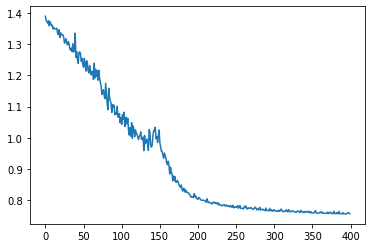

In [ ]:
import matplotlib.pyplot as plt
plt.plot(main_losses)

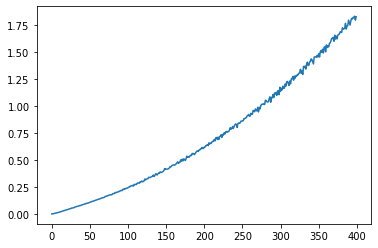

In [ ]:
plt.plot(adv_losses)